In [ ]:
#Copy/slighlt modified version of code from “Kalman and Bayesian Filters in Python” Chapter 4, measuring voltage

In [10]:
import numpy as np
import filterpy
#from filterpy.kalman import KalmanFilter as kf
#from filterpy.kalman import predict
#from filterpy.kalman import update
from numpy.random import randn
from filterpy.common import Q_discrete_white_noise
import matplotlib.pyplot as plt
import filterpy.stats as stats
import math
from math import sqrt

In [11]:
from collections import namedtuple
gaussian = namedtuple('Gaussian', ['mean', 'var'])
gaussian.__repr__ = lambda s: '𝒩(μ={:.3f}, 𝜎²={:.3f})'.format(s[0], s[1])

def print_gh(predict, update, z):
    predict_template = '{: 7.3f} {: 8.3f}'
    update_template = '{:.3f}\t{: 7.3f} {: 7.3f}'

    print(predict_template.format(predict[0], predict[1]),end='\t')
    print(update_template.format(z, update[0], update[1]))

def update(prior, measurement):
    x, P = prior        # mean and variance of prior
    z, R = measurement  # mean and variance of measurement
    
    y = z - x        # residual
    K = P / (P + R)  # Kalman gain

    x = x + K*y      # posterior
    P = (1 - K) * P  # posterior variance
    return gaussian(x, P)

def predict(posterior, movement):
    x, P = posterior # mean and variance of posterior
    dx, Q = movement # mean and variance of movement
    x = x + dx
    P = P + Q
    return gaussian(x, P)

def volt(voltage, std):
    return voltage + (randn() * std)

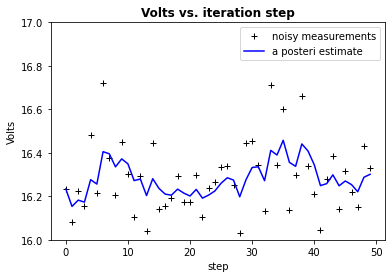

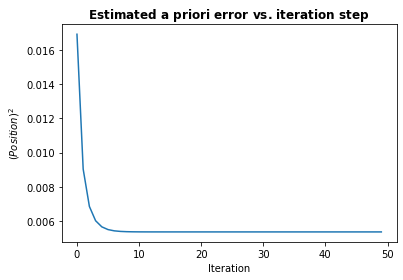

Variance converges to 0.005


In [12]:
temp_change = 0
voltage_std = .13
process_var = .05**2
actual_voltage = 16.3

x = gaussian(25., 1000.) # initial state
process_model = gaussian(0., process_var)

N = 50
zs = [volt(actual_voltage, voltage_std) for i in range(N)]
ps = []
estimates = []

for z in zs:
    prior = predict(x, process_model)
    x = update(prior, gaussian(z, voltage_std**2))

    # save for latter plotting
    estimates.append(x.mean)
    ps.append(x.var)

def plotstuff():
    plt.figure()
    plt.plot(zs,'k+',label='noisy measurements')
    plt.plot(estimates,'b-',label='a posteri estimate')
    #plt.plot(ztrue,color='g',label='true value')
    #plt.plot(xhat,'r*',label='prediction')
    plt.ylim(16,17)
    plt.legend()
    plt.title('Volts vs. iteration step', fontweight='bold')
    plt.xlabel('step')
    plt.ylabel('Volts')
    
    plt.figure()
    valid_iter = range(1,N) # Pminus not valid at step 0
    plt.plot(ps,label='a priori error estimate')
    plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
    plt.xlabel('Iteration')
    plt.ylabel('$(Position)^2$')
    #plt.etp(plt.gca(),'ylim',[0,.01])
    plt.show()
    
plotstuff()
print('Variance converges to {:.3f}'.format(ps[-1]))